In [13]:
import pandas as pd
import seaborn as sns
import spacy

things to do:
- summary data of how many reviews from which branch
- reviewer location (how many from Singapore)
- what year-month are the reviews from
- what is the general ratings for each branch

In [3]:
original = pd.read_csv("data/DisneylandReviews.csv", encoding='latin1')
df = original.copy()
df

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong
...,...,...,...,...,...,...
42651,1765031,5,missing,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris
42652,1659553,5,missing,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris
42653,1645894,5,missing,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris
42654,1618637,4,missing,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris


In [4]:
df['Branch'] = df['Branch'].astype('category')
df["Year_Month"] = pd.to_datetime(df["Year_Month"], format="%Y-%m", errors = "coerce")
df["Reviewer_Location"] = df["Reviewer_Location"].astype('category')
df = df.rename(columns={
    "Reviewer_Location" : "Location"
})
df

,Review_ID,Rating,Year_Month,Location,Review_Text,Branch
0,670772142,4,2019-04-01,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-05-01,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-04-01,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-04-01,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-04-01,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong
...,...,...,...,...,...,...
42651,1765031,5,NaT,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris
42652,1659553,5,NaT,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris
42653,1645894,5,NaT,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris
42654,1618637,4,NaT,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris


In [15]:
location = df.groupby("Location").count().sort_values(by="Review_ID", ascending=False)
sg_percentage = location.count()/df[df.Location == "Singapore"].count()*100
sg_percentage.Review_Text
# Find total Singapore reviews
sg_reviews = df[df.Location == "Singapore"].shape[0]
total_reviews = df.shape[0]
sg_percentage = (sg_reviews / total_reviews) * 100

print(f"Singapore reviews: {sg_reviews} out of {total_reviews} ({sg_percentage:.2f}%)")
# Get top 10 locations by review count

top10_locations = location.head(10)
top10_locations['Percentage'] = (top10_locations['Review_ID'] / total_reviews) * 100
top10_locations


Singapore reviews: 1037 out of 42656 (2.43%)


/var/folders/4k/8zjs5w191wn6mjqcxkws37dw0000gn/T/ipykernel_81595/2875215470.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  location = df.groupby("Location").count().sort_values(by="Review_ID", ascending=False)
/var/folders/4k/8zjs5w191wn6mjqcxkws37dw0000gn/T/ipykernel_81595/2875215470.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10_locations['Percentage'] = (top10_locations['Review_ID'] / total_reviews) * 100


,Review_ID,Rating,Year_Month,Review_Text,Branch,Percentage
Location,,,,,,
United States,14551,14551,13522,14551,14551,34.112434
United Kingdom,9751,9751,9115,9751,9751,22.859621
Australia,4679,4679,4412,4679,4679,10.969149
Canada,2235,2235,2116,2235,2235,5.239591
India,1511,1511,1470,1511,1511,3.542292
Philippines,1070,1070,1024,1070,1070,2.508440
Singapore,1037,1037,971,1037,1037,2.431077
New Zealand,756,756,714,756,756,1.772318
Malaysia,588,588,562,588,588,1.378470


Singapore reviews: 1037 out of 42656 (2.43%) - country with the 7th highest number of reviews.

/var/folders/4k/8zjs5w191wn6mjqcxkws37dw0000gn/T/ipykernel_81595/2165113529.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  branch_ratings = df.groupby('Branch')['Rating'].agg(['mean', 'count', 'std'])


Average Ratings by Branch:
                  Branch      mean  count       std
0  Disneyland_California  4.405339  19406  0.975600
1    Disneyland_HongKong  4.204158   9620  0.932989
2       Disneyland_Paris  3.960088  13630  1.205324


/var/folders/4k/8zjs5w191wn6mjqcxkws37dw0000gn/T/ipykernel_81595/2165113529.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sb.barplot(x='Branch', y='mean', data=branch_ratings, palette='viridis')


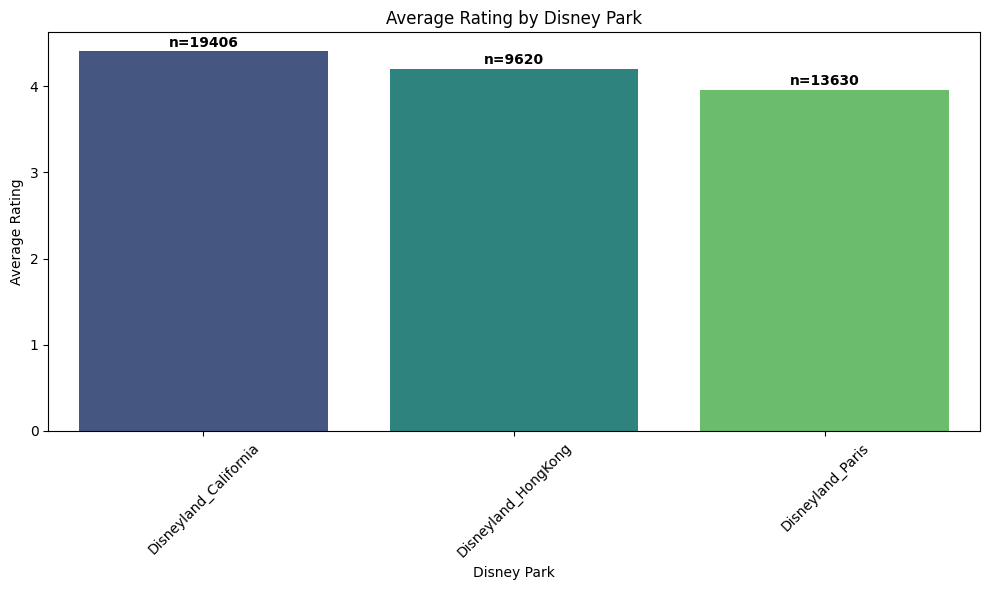

/var/folders/4k/8zjs5w191wn6mjqcxkws37dw0000gn/T/ipykernel_81595/2165113529.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x='Branch', y='Rating', data=df, palette='viridis')


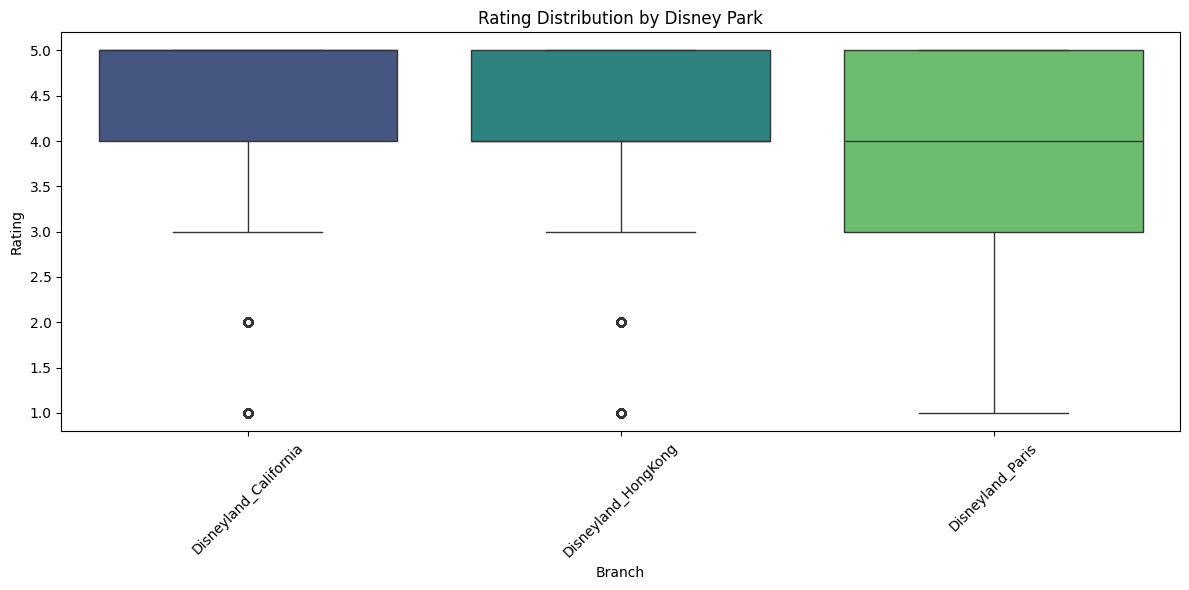

In [ ]:
# ratings distribution
branch_ratings = df.groupby('Branch')['Rating'].agg(['mean', 'count', 'std'])
branch_ratings = branch_ratings.sort_values(by='mean', ascending=False)
branch_ratings = branch_ratings.reset_index()

print("Average Ratings by Branch:")
print(branch_ratings)

# ratings by branch
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
ax = sb.barplot(x='Branch', y='mean', data=branch_ratings, palette='viridis')
plt.title('Average Rating by Disney Park')
plt.ylabel('Average Rating')
plt.xlabel('Disney Park')
plt.xticks(rotation=45)

for i, row in enumerate(branch_ratings.itertuples()):
    ax.text(i, row.mean + 0.05, f'n={row.count}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# rating distribution
plt.figure(figsize=(12, 6))
sb.boxplot(x='Branch', y='Rating', data=df, palette='viridis')
plt.title('Rating Distribution by Disney Park')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/4k/8zjs5w191wn6mjqcxkws37dw0000gn/T/ipykernel_81595/1794418310.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  branch_word_counts = df.groupby('Branch')['word_count'].agg(['mean', 'median', 'min', 'max', 'count'])
/var/folders/4k/8zjs5w191wn6mjqcxkws37dw0000gn/T/ipykernel_81595/1794418310.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x='Branch', y='word_count', data=df, palette='viridis')


Average Word Count per Review by Branch:
                             mean  median  min   max  count
Branch                                                     
Disneyland_Paris       169.369773   112.0    3  3963  13630
Disneyland_California  115.449036    71.0    7  3527  19406
Disneyland_HongKong    102.259044    70.0    6  1591   9620

Overall average word count across all reviews: 129.70 words


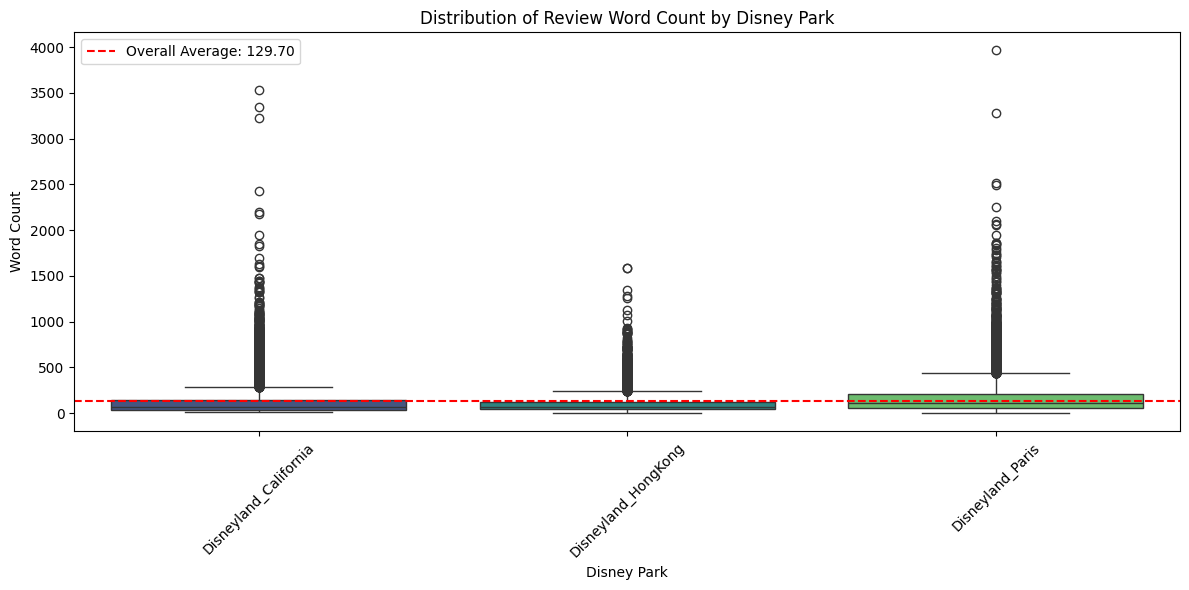

/var/folders/4k/8zjs5w191wn6mjqcxkws37dw0000gn/T/ipykernel_81595/1794418310.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Branch')


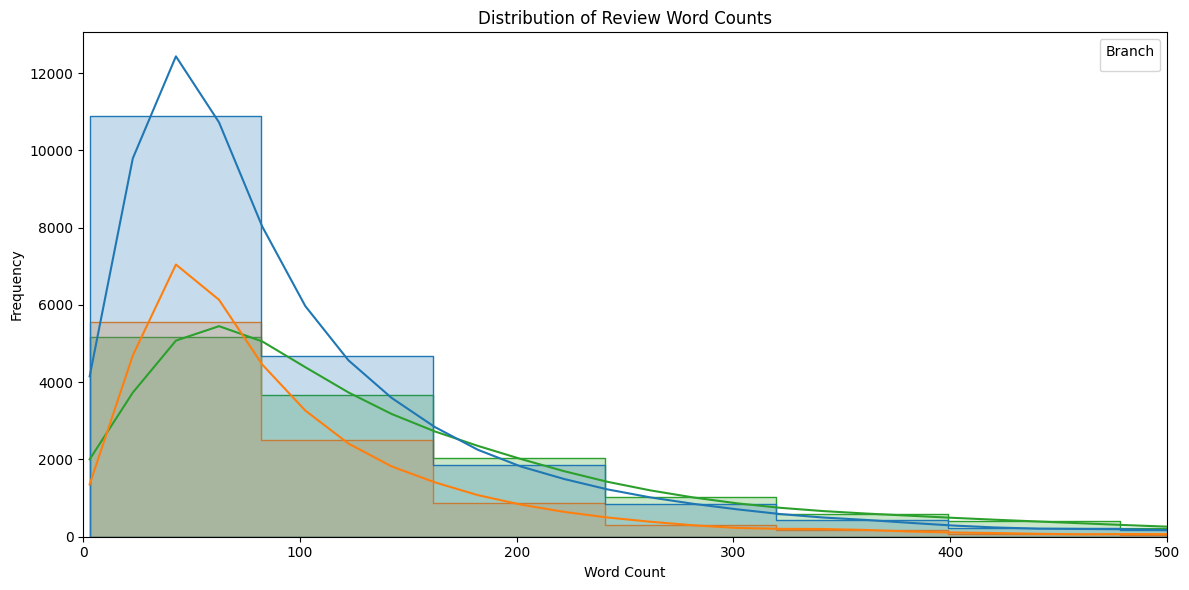

In [17]:
# Calculate the word count for each review
df['word_count'] = df['Review_Text'].str.split().str.len()

# Calculate average word count per review for each branch
branch_word_counts = df.groupby('Branch')['word_count'].agg(['mean', 'median', 'min', 'max', 'count'])
branch_word_counts = branch_word_counts.sort_values(by='mean', ascending=False)

# Display summary statistics
print("Average Word Count per Review by Branch:")
print(branch_word_counts)

# Overall average
overall_avg = df['word_count'].mean()
print(f"\nOverall average word count across all reviews: {overall_avg:.2f} words")

# Visualize the distribution
plt.figure(figsize=(12, 6))
sb.boxplot(x='Branch', y='word_count', data=df, palette='viridis')
plt.title('Distribution of Review Word Count by Disney Park')
plt.ylabel('Word Count')
plt.xlabel('Disney Park')
plt.xticks(rotation=45)
plt.axhline(overall_avg, color='red', linestyle='--', label=f'Overall Average: {overall_avg:.2f}')
plt.legend()
plt.tight_layout()
plt.show()

# Word count distribution histogram
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='word_count', hue='Branch', bins=50, kde=True, element='step')
plt.title('Distribution of Review Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.xlim(0, 500)  # Limiting x-axis to better visualize the common range
plt.legend(title='Branch')
plt.tight_layout()
plt.show()

In [4]:

import numpy as np
# No need to reimport pandas and spacy as they are already imported

# Load spaCy model - using the existing nlp object
words_cleaned = pd.read_csv("data/processed.csv")

# Create a vector column to store the vectors
words_cleaned['vector'] = None

# Process texts in batches to improve performance
batch_size = 100
total_rows = len(words_cleaned)

for start_idx in range(0, total_rows, batch_size):
    end_idx = min(start_idx + batch_size, total_rows)
    print(f"Processing batch {start_idx} to {end_idx-1} of {total_rows}")
    
    batch_texts = words_cleaned.loc[start_idx:end_idx-1, 'ProcessedText'].tolist()
    batch_docs = list(nlp.pipe(batch_texts))
    
    for i, doc in enumerate(batch_docs):
        # Store the vector as a numpy array (more compatible with pandas)
        words_cleaned.at[start_idx + i, 'vector'] = doc.vector


Processing batch 0 to 99 of 42656
Processing batch 100 to 199 of 42656
Processing batch 200 to 299 of 42656
Processing batch 300 to 399 of 42656
Processing batch 400 to 499 of 42656
Processing batch 500 to 599 of 42656
Processing batch 600 to 699 of 42656
Processing batch 700 to 799 of 42656
Processing batch 800 to 899 of 42656
Processing batch 900 to 999 of 42656
Processing batch 1000 to 1099 of 42656
Processing batch 1100 to 1199 of 42656
Processing batch 1200 to 1299 of 42656
Processing batch 1300 to 1399 of 42656
Processing batch 1400 to 1499 of 42656
Processing batch 1500 to 1599 of 42656
Processing batch 1600 to 1699 of 42656
Processing batch 1700 to 1799 of 42656
Processing batch 1800 to 1899 of 42656
Processing batch 1900 to 1999 of 42656
Processing batch 2000 to 2099 of 42656
Processing batch 2100 to 2199 of 42656
Processing batch 2200 to 2299 of 42656
Processing batch 2300 to 2399 of 42656
Processing batch 2400 to 2499 of 42656
Processing batch 2500 to 2599 of 42656
Processin

In [5]:
words_cleaned.to_csv("data/processed_with_vectors.csv", index=False)

In [4]:

import pandas as pd
import numpy as np
import re

def convert_string_embeddings(df, embedding_column='embedding'):
    """
    Convert string representations of embeddings to numpy arrays.
    Handles multiple string formats safely.
    
    Args:
        df: DataFrame containing the embeddings
        embedding_column: Name of the column containing string embeddings
        
    Returns:
        DataFrame with properly converted embedding arrays
    """
    # Create a copy to avoid modifying the original
    df_copy = df.copy()
    
    # Function to safely convert a string to numpy array
    def string_to_array(embedding_str):
        try:
            # Handle common string formats
            if isinstance(embedding_str, str):
                # Remove any extra characters that might cause syntax errors
                cleaned_str = embedding_str.strip()
                
                # If it looks like a numpy array string
                if cleaned_str.startswith('[') and cleaned_str.endswith(']'):
                    # Clean the string and convert it to a list of floats
                    nums_str = cleaned_str.strip('[]')
                    # Handle different number formats and separators
                    nums = re.findall(r'-?\d+\.?\d*(?:e[-+]?\d+)?', nums_str)
                    return np.array([float(x) for x in nums])
                
                # If it's some other format, try a different approach
                else:
                    # Try direct eval (but only if it's a valid number format)
                    cleaned_str = re.sub(r'[^\d\.\-e\+\s\[\],]', '', cleaned_str)
                    return np.array(eval(cleaned_str))
            
            # If it's already a numpy array or list
            elif isinstance(embedding_str, (np.ndarray, list)):
                return np.array(embedding_str)
            
            else:
                print(f"Unknown embedding format: {type(embedding_str)}")
                return np.zeros(300)  # Return zero vector as fallback
                
        except Exception as e:
            print(f"Error converting embedding: {e}")
            print(f"Problematic string: {embedding_str[:100]}...")
            return np.zeros(300)  # Return zero vector on error
    
    # Apply the conversion function
    print("Converting embeddings to numpy arrays...")
    df_copy[embedding_column] = df_copy[embedding_column].apply(string_to_array)
    
    # Verify conversion worked for at least the first element
    if len(df_copy) > 0:
        first_embedding = df_copy[embedding_column].iloc[0]
        print(f"First embedding shape: {first_embedding.shape}")
    
    return df_copy

# Example usage
if __name__ == "__main__":
    # Load your dataframe
    df = pd.read_csv('data/processed_with_vectors.csv')
    
    # Convert the embeddings
    df_converted = convert_string_embeddings(df, embedding_column='vector')
    
    # Now you can extract embeddings as a numpy array for topic modeling
    embeddings = np.vstack(df_converted['vector'].values)
    print(f"Extracted embeddings shape: {embeddings.shape}")

vectors = pd.read_csv('data/processed_with_vectors.csv')
df = convert_string_embeddings(vectors, embedding_column='vector')

Converting embeddings to numpy arrays...
First embedding shape: (300,)
Extracted embeddings shape: (42656, 300)
Converting embeddings to numpy arrays...
First embedding shape: (300,)


Loading data...
Extracting embeddings...
Applying K-means clustering with 15 topics...
Initialization complete
Iteration 0, inertia 57662.33912765024.
Iteration 1, inertia 47390.54113197865.
Iteration 2, inertia 46131.76923621989.
Iteration 3, inertia 45657.7988790932.
Iteration 4, inertia 45436.195960816476.
Iteration 5, inertia 45307.55657238521.
Iteration 6, inertia 45222.15060283221.
Iteration 7, inertia 45164.86553690254.
Iteration 8, inertia 45128.807073515505.
Iteration 9, inertia 45103.647894349495.
Iteration 10, inertia 45084.83679662447.
Iteration 11, inertia 45068.117767426265.
Iteration 12, inertia 45051.94720606424.
Iteration 13, inertia 45037.566082231744.
Iteration 14, inertia 45026.56717989508.
Iteration 15, inertia 45017.139644229654.
Iteration 16, inertia 45009.49052739765.
Iteration 17, inertia 45002.31964739342.
Iteration 18, inertia 44995.60667269546.
Iteration 19, inertia 44989.30149937977.
Iteration 20, inertia 44983.31399184469.
Iteration 21, inertia 44977.77794

/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


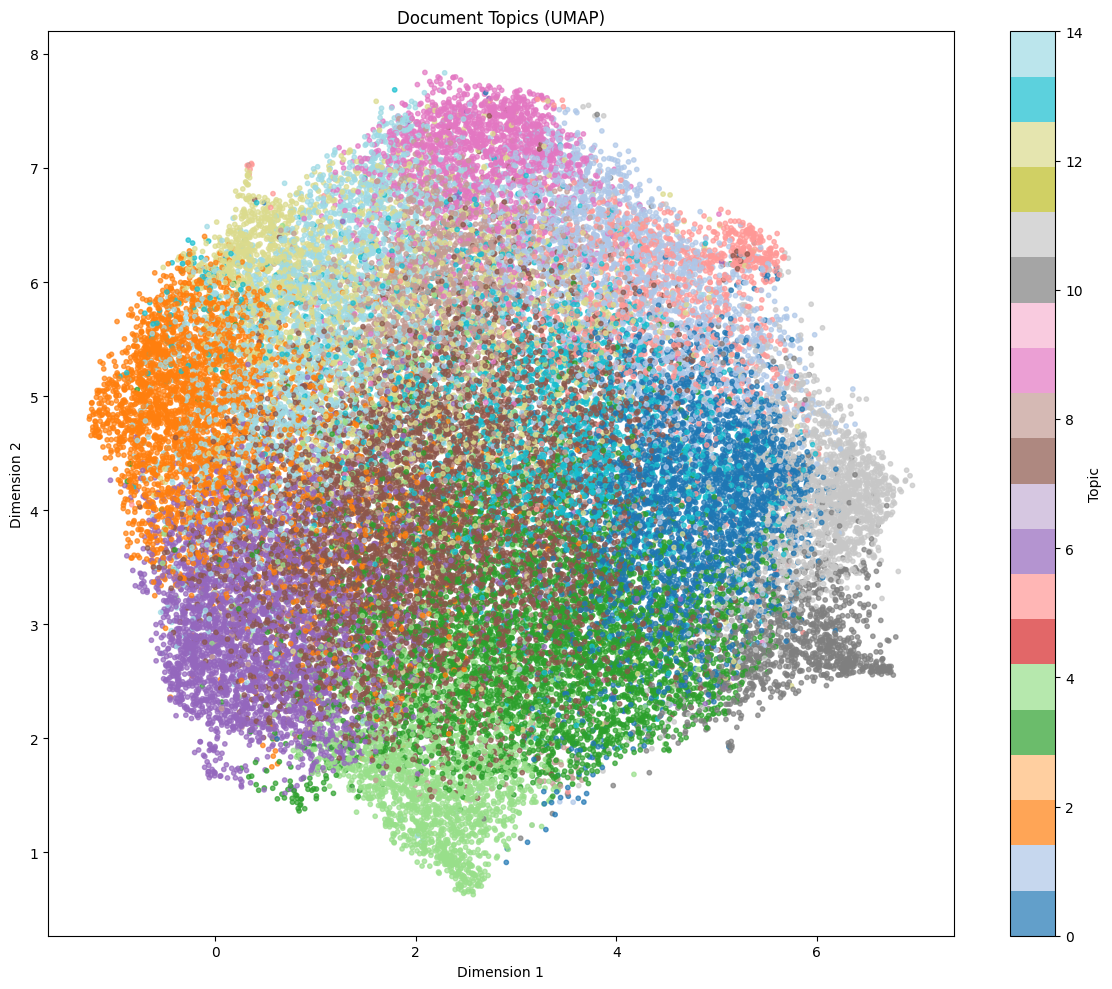

Finding representative documents for each topic...

Topic 0 representative documents:
  - person disneyland disneyworld multiple time anxious excited disneyland paris offer buy ticket flash ...
  - let accidental visit hawaii holiday attempt fly tennessee january freeze hit flight delay day leg hi...
  - disneyland grow up know go vintage like disneyland feel like kid thoroughly enjoy visit visit west c...
  - know t help unbiased truthful pertain mickey mouse disneyland happy place world happy place fantasti...
  - spend day disneyland anaheim enjoy love park clean friendly lot fun disappointment australia opportu...

Topic 1 representative documents:
  - disneyland resort reviewwho enjoy disney movie right everybody love disney movie mean love right cla...
  - orlando disneyland time time paris disneyland birthday present fiance orlando lot well paris amazing...
  - road trip family decide spontaneous trip disneyland day christmas excited disney definitely disappoi...
  - hk disney g

In [5]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import umap
from tqdm import tqdm

def apply_kmeans_clustering(embeddings, n_clusters=10, random_state=42):
    """
    Apply K-means clustering to document embeddings for topic modeling.
    
    Args:
        embeddings: Document embeddings matrix (numpy array)
        n_clusters: Number of clusters/topics to identify
        random_state: Random seed for reproducibility
        
    Returns:
        kmeans: The trained K-means model
        labels: Cluster assignments for each document
    """
    print(f"Applying K-means clustering with {n_clusters} topics...")
    
    # Apply K-means
    kmeans = KMeans(
        n_clusters=n_clusters,
        random_state=random_state,
        n_init=10,
        verbose=1
    )
    
    labels = kmeans.fit_predict(embeddings)
    
    # Calculate silhouette score if needed
    # from sklearn.metrics import silhouette_score
    # score = silhouette_score(embeddings, labels)
    # print(f"Silhouette score: {score:.4f}")
    
    return kmeans, labels

def dimensionality_reduction(embeddings, method='pca', n_components=2):
    """
    Reduce dimensionality of embeddings for visualization.
    
    Args:
        embeddings: Document embeddings matrix
        method: Reduction method ('pca', 'tsne', or 'umap')
        n_components: Number of dimensions in output
        
    Returns:
        reduced_embeddings: Lower-dimensional representation
    """
    print(f"Applying {method.upper()} for dimensionality reduction...")
    
    if method.lower() == 'pca':
        reducer = PCA(n_components=n_components, random_state=42)
        reduced_embeddings = reducer.fit_transform(embeddings)
    
    elif method.lower() == 'tsne':
        reducer = TSNE(
            n_components=n_components,
            perplexity=30,
            n_iter=1000,
            random_state=42
        )
        reduced_embeddings = reducer.fit_transform(embeddings)
    
    elif method.lower() == 'umap':
        reducer = umap.UMAP(
            n_components=n_components,
            min_dist=0.1,
            random_state=42
        )
        reduced_embeddings = reducer.fit_transform(embeddings)
    
    else:
        raise ValueError("Method must be 'pca', 'tsne', or 'umap'")
    
    return reduced_embeddings

def visualize_topics(reduced_embeddings, labels, title="Document Topics"):
    """
    Visualize documents colored by their topic assignments.
    
    Args:
        reduced_embeddings: 2D embeddings for visualization
        labels: Topic assignments for each document
        title: Plot title
    """
    plt.figure(figsize=(12, 10))
    
    # Create a scatter plot
    scatter = plt.scatter(
        reduced_embeddings[:, 0],
        reduced_embeddings[:, 1],
        c=labels,
        cmap='tab20',
        alpha=0.7,
        s=10
    )
    
    # Add a colorbar
    cbar = plt.colorbar(scatter)
    cbar.set_label('Topic')
    
    # Add labels and title
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title(title)
    
    plt.tight_layout()
    plt.savefig('topic_visualization.png', dpi=300)
    plt.show()

def identify_representative_documents(df, embeddings, kmeans, n_docs=5):
    """
    Find the most representative documents for each topic.
    
    Args:
        df: DataFrame containing the original documents
        embeddings: Document embeddings
        kmeans: Trained K-means model
        n_docs: Number of representative documents to return per topic
        
    Returns:
        representative_docs: Dictionary mapping topics to representative documents
    """
    print("Finding representative documents for each topic...")
    
    # Get cluster centers
    centers = kmeans.cluster_centers_
    
    # Find distances from each point to each cluster center
    labels = kmeans.labels_
    
    representative_docs = {}
    
    # For each topic/cluster
    for topic_id in range(len(centers)):
        # Get indices of documents in this cluster
        doc_indices = np.where(labels == topic_id)[0]
        
        if len(doc_indices) == 0:
            continue
        
        # Get embeddings for these documents
        topic_doc_embeddings = embeddings[doc_indices]
        
        # Calculate distance to cluster center
        distances = np.linalg.norm(topic_doc_embeddings - centers[topic_id], axis=1)
        
        # Get indices of closest documents
        closest_indices = np.argsort(distances)[:n_docs]
        
        # Get the actual document indices in the original dataframe
        original_indices = doc_indices[closest_indices]
        
        # Store representative documents
        representative_docs[topic_id] = original_indices
    
    return representative_docs

def add_topics_to_dataframe(df, labels, embedding_col=None):
    """
    Add topic assignments back to the original dataframe.
    
    Args:
        df: Original dataframe
        labels: Topic assignments from clustering
        embedding_col: Name of column containing embeddings (to remove if needed)
        
    Returns:
        df_with_topics: DataFrame with topic assignments
    """
    df_with_topics = df.copy()
    df_with_topics['topic'] = labels
    
    # Optionally remove the embedding column to save memory
    if embedding_col and embedding_col in df_with_topics.columns:
        df_with_topics = df_with_topics.drop(columns=[embedding_col])
    
    return df_with_topics

def main(df):
    # Load your DataFrame with the embeddings column
    # This assumes you have a column of embeddings already
    print("Loading data...")
    df = df
    
    # If embeddings are stored as strings (serialized arrays), convert them to numpy arrays
    # Example: if your embeddings are stored as strings like "[0.1, 0.2, ...]"
    if isinstance(df['vector'][0], str):
        print("Converting string embeddings to numpy arrays...")
        df['vector'] = df['vector'].apply(lambda x: np.array(eval(x)))
    
    # Extract embeddings into a numpy array
    print("Extracting embeddings...")
    embeddings = np.vstack(df['vector'].values)
    
    # Apply dimensionality reduction if needed (optional, but helps with clustering)
    # This is especially useful if your embeddings are high-dimensional (e.g., 300D from spaCy)
    reduced_embeddings = TruncatedSVD(n_components=100, random_state=42).fit_transform(embeddings)
    
    # Apply K-means clustering for topic modeling
    kmeans, topic_labels = apply_kmeans_clustering(reduced_embeddings, n_clusters=15)
    
    # Add topic assignments back to the dataframe
    df_with_topics = add_topics_to_dataframe(df, topic_labels, embedding_col=None)
    
    # Save results
    df_with_topics.to_csv('documents_with_topics.csv', index=False)
    
    # Create a visualization
    viz_embeddings = dimensionality_reduction(reduced_embeddings, method='umap', n_components=2)
    visualize_topics(viz_embeddings, topic_labels, title="Document Topics (UMAP)")
    
    # Find representative documents for each topic
    rep_docs = identify_representative_documents(df, reduced_embeddings, kmeans, n_docs=5)
    
    # Print examples from each topic
    for topic_id, doc_indices in rep_docs.items():
        print(f"\nTopic {topic_id} representative documents:")
        for idx in doc_indices:
            # Print a snippet of the document (adjust field names as needed)
            text_field = 'ProcessedText' if 'ProcessedText' in df.columns else 'text'
            print(f"  - {df[text_field].iloc[idx][:100]}...")
    
    print("\nTopic modeling complete!")

if __name__ == "__main__":
    main(df)

I've analyzed the topic model results from your document. Here's a breakdown of what each topic appears to represent:

## Topic 0: General Disney Experience & Impressions
This topic captures overall impressions of Disneyland visits, with themes of excitement, anxiety, and general feelings about the parks. There are mentions of Disneyland Paris and comparisons between different Disney parks.

## Topic 1: Disney Resorts & International Visits
Focuses on Disney resorts, especially international locations like Paris and Hong Kong. Contains reviews comparing different Disney locations and experiences of traveling to Disney parks from abroad.

## Topic 2: Family Visits with Children
Centered on family experiences at Disney, particularly parents taking children to the parks. Includes advice about tickets, queue times, and planning family trips with kids in mind.

## Topic 3: Park Comparisons & Trip Planning
Contains comparisons between different Disney parks (particularly Florida's Disney World vs. Disneyland Paris/California). Includes logistics of traveling to different parks and multi-day visit planning.

## Topic 4: Disney Paris Experiences & Reviews
Specifically focused on Disneyland Paris experiences, with many reviews addressing expectations vs. reality. Includes hotel stays, transportation, and facilities at the Paris location.

## Topic 5: Seasonal Visits & Special Events
Highlights seasonal visits and special events at Disney parks, particularly Halloween celebrations. Contains impressions of park decorations and atmosphere during special times.

## Topic 6: Anniversary & Special Occasion Visits
Focuses on trips to Disney for special occasions like anniversaries, honeymoons, and school holidays. Includes expectations and planning for these milestone visits.

## Topic 7: Family Dynamics & Changing Experiences
Discusses how Disney experiences change as families grow (teenagers vs. young children), coordination between family members, and return visits over time.

## Topic 8: Disney Magic & Experience Quality
Centers on the "magical" Disney experience, with emphasis on the parks being "happy places" and discussions of parade quality, staff interactions, and overall atmosphere.

## Topic 9: Multi-Generational Experiences
Discusses Disney from different age perspectives - adults enjoying it, children's reactions, and family bonding across generations. The "happy place on earth" theme appears frequently.

## Topic 10: Hong Kong Disneyland
Specifically about the Hong Kong Disneyland location, with comparisons to other international Disney parks and experiences specific to this location.

## Topic 11: Disney Park Comparisons & Fan Experiences
Features avid Disney fans comparing multiple parks they've visited. Includes discussions from people who have been to multiple Disney locations worldwide.

## Topic 12: Repeat Visits & Celebrations
Focuses on repeat visitors and those celebrating special occasions like birthdays. Contains reflections on how experiences change across multiple visits.

## Topic 13: Value & Experience Quality
Centers on discussions of whether Disney visits are "worth it" - discussing ticket prices, experience quality, and overall value assessments from visitors.

## Topic 14: Seasonal Timing & Visit Planning
Specifically about timing visits (avoiding peak seasons, weather considerations) and how different seasons affect the Disney experience.

These topics reflect different aspects of Disney park experiences, from practical planning considerations to emotional reactions and specific location differences. Would you like me to elaborate on any particular topic?